# FINANCIAL PROGRAMMING - IÉSEG, Lille - MBD 2018-2019
## Group Project By : Nitesh Shanbhag, Manju Nagaraj Rudrappa, Lucas Bonnett

#### This Project is to create a basetable for the PKDD'99 Discovery Challenge

#### Basically the bank wants to improve the Services and distinguish more closely on who is a good client (to offer additional services) & who is a bad client (whom to watch carefully to minimize the bank loses).

#### The bank has provided data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The below Basetables will help bank managers improve their understanding of customers and seek specific actions to improve services.


#### Final Client Basetable : Client Characteristics which includes 1 row per Client


##### Importing Packages :

In [19]:
# Import libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


##### Path of Input Datasets :

In [20]:
path = "C:\\Users\\mrudrappa\\Desktop\\python group assignment\\MBD2018_FP_GroupAssignment_FinancialData\\data_berka\\"

##### Import Datasets :

In [21]:
client = pd.read_csv(path + "client.asc",sep=";")
account = pd.read_csv(path + "account.asc",sep=";")
disp = pd.read_csv(path + "disp.asc",sep=";")
card = pd.read_csv(path + "card.asc",sep=";")
district = pd.read_csv(path + "district.asc",sep=";")
loan = pd.read_csv(path + "loan.asc",sep=";")
order = pd.read_csv(path + "order.asc",sep=";")
trans = pd.read_csv(path + "trans.asc",sep=";")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###          DEMOGRAPHIC DATASET 

### This Dataset was cleaned with following steps 
### 1) Probability of the Client being an Entrepreneur was calculated
### 2) Probability of the client commiting a Crime in year 1995/1996 was calculated
### 3) Special Characters in the values were replaced with mean of the other valid values of that columns.
### 4) Objects were converted to numeric.


In [22]:
# summary of district 
summary = district.describe()    
summary = summary.transpose() 
print(summary) 


     count           mean            std       min       25%       50%  \
A1    77.0      39.000000      22.371857      1.00     20.00      39.0   
A4    77.0  133884.896104  136913.464909  42821.00  85852.00  108871.0   
A5    77.0      48.623377      32.741829      0.00     22.00      49.0   
A6    77.0      24.324675      12.780991      0.00     16.00      25.0   
A7    77.0       6.272727       4.015222      0.00      4.00       6.0   
A8    77.0       1.727273       1.008338      0.00      1.00       2.0   
A9    77.0       6.259740       2.435497      1.00      5.00       6.0   
A10   77.0      63.035065      16.221727     33.90     51.90      59.8   
A11   77.0    9031.675325     790.202347   8110.00   8512.00    8814.0   
A13   77.0       3.787013       1.908480      0.43      2.31       3.6   
A14   77.0     116.129870      16.608773     81.00    105.00     113.0   
A16   77.0    5030.831169   11270.796786    888.00   2122.00    3040.0   

           75%        max  
A1       

In [23]:
# head 
district.head(6)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
5,6,Kutna Hora,central Bohemia,77963,60,23,4,2,4,51.5,8546,2.95,4.02,126,2640,3120


In [24]:
# Rename the columns
district = district.rename(columns={"A1":"district_id","A2":"district_name","A3":"region","A4":"no_of_inhabitants",
                         "A5":"munci_lt_499","A6":"munci_500_1999","A7":"munci_2000_9999",
                         "A8":"munci_gt_10000","A9":"no_of_cities","A10":"ratio_of_urban_inhab",
                         "A11":"district_averagr_salary","A12":"unemployement_rate_1995","A13":"unemployement_rate_1996",
                         "A14":"prob_enterpreneur","A15":"prob_commited_crimes_1995","A16":"prob_commited_crimes_1996"})



In [25]:
#converted objects to numeric 
district = district.convert_objects(convert_numeric =True)

#fill nan values by mean
district = district.fillna(district.mean())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [26]:
#find the probabilities
district["prob_enterpreneur"] = district["prob_enterpreneur"] / 1000
district["prob_commited_crimes_1995"] = district["prob_commited_crimes_1995"] / district["no_of_inhabitants"]
district["prob_commited_crimes_1996"] = district["prob_commited_crimes_1996"] / district["no_of_inhabitants"]

# check the data types of variables
district.dtypes                      
                


district_id                    int64
district_name                 object
region                        object
no_of_inhabitants              int64
munci_lt_499                   int64
munci_500_1999                 int64
munci_2000_9999                int64
munci_gt_10000                 int64
no_of_cities                   int64
ratio_of_urban_inhab         float64
district_averagr_salary        int64
unemployement_rate_1995      float64
unemployement_rate_1996      float64
prob_enterpreneur            float64
prob_commited_crimes_1995    float64
prob_commited_crimes_1996    float64
dtype: object

####        CLIENT DATASET :
#### We have assumed the current year as 1999.
#### 1) Transformed the Birth Number into Birth Date and Gender was derived
#### 2)  Age and Agegroup was calculated.


In [27]:
# Transform the birth day into year
client['birth_year'] = client['birth_number'].transform(lambda bn: int('19' + str(bn)[:2]))

# Transform the birth day into day
client['birth_day'] = client['birth_number'].transform(lambda bn: int(str(bn)[4:6]))
# Age 
client['age'] = 1999 - client['birth_year']

# Age group
client['age_group'] = client['age'] // 10 * 10


In [28]:
# Function to extract birth month and gender
def to_month_gender(birth_number):
    
    s = str(birth_number)
    birth_month = int(s[2:4])
    
    if birth_month > 50:
        gender = "F"
        birth_month = birth_month - 50
    else:
        gender = 'M'
        
    return pd.Series({'birth_month':birth_month, 'gender':gender})

client[['birth_month', 'gender']] = client['birth_number'].apply(to_month_gender)

# derive variable birth date
client['birth_date'] = client.apply(lambda row: datetime(row['birth_year'], row['birth_month'], row['birth_day']), axis=1)
client['birth_date'] = pd.to_datetime(client['birth_date']).dt.date


In [29]:
# drop unwanted columns
client = client.drop(['birth_year', 'birth_number','birth_month','birth_day'], axis=1)


####        CREDIT CARD DATASET :
#### Date Issued was converted to Date Object.


In [30]:
card['issued'] = pd.to_datetime(card['issued']).dt.date
card = card.rename(columns = {"type":"credit_card_type","issued":"credit_card_issue_date"})
card['credit_card_issue__year'] = card['credit_card_issue_date'].transform(lambda bn: int(str(bn)[:4]))

####        LOAN DATASET :
#### 1) Date Issued was converted to Date Object.
#### 2) Status values were changed into understandable Values.

In [31]:
#change the date format
loan[['date']] = loan[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:],s[2:4],s[0:2]))

#drop loan id
loan = loan.drop(["loan_id"], axis=1)

# change the description of the field status 
loan['status'] = loan['status'].map({'A': 'Contract finished without Issue', 'B': 'Contract Finished Loan Not Paid'
                                      , 'C': 'Contract Running ok so far', 'D' : 'Contract Running Debt'})
# rename the columns
loan = loan.rename(index=str, columns={"date": "LoanIssuedDate", "amount": "LoanAmount"
                                       ,"duration": "LoanDuration","payments": "LoanPayment","status": "LoanStatus"})


####        ORDER DATASET :
####  1) Date Issued was converted to Date Object.
####  2) K-symbol with nan or spaces were converted into Others
####  3) Ksymbol was pivoted as columns(pivot) with Amount Values filled in it 
####       Overall One row per acount id was maintained

In [32]:
order.count()
order['account_to'].nunique()
order = order.drop(["order_id"], axis=1)
order = order.drop(["bank_to"], axis=1)
order = order.drop(["account_to"], axis=1)
order['k_symbol'].unique().tolist()


order.loc[order['k_symbol'] == " ", 'k_symbol'] = 'Other'


order = order.pivot_table(index=['account_id'],columns='k_symbol',values='amount',fill_value=0)
order.columns.name = None
order = order.reset_index()


order['account_id'].nunique()



3758

In [33]:
# As the Above is also equal to 3758 = Number of records in Order so that means all Account_id is unique.


#### ACCOUNT DATASET                    
#### 1) Length of Relationship was Derived as of 1999 with account opened year
#### 2) Frequency values were mapped with understandable values


In [34]:

# account year tofind length of relation
account['account_created_year'] = account['date'].transform(lambda bn: int('19' + str(bn)[:2]))

# length of relation
account['length_of_relation'] = 1999 - account['account_created_year']

account[['date']] = account[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[2:4],s[4:],s[0:2]))

account['frequency'].unique().tolist()
account['frequency'] = account['frequency'].map({'POPLATEK MESICNE': 'Monthly Issuance',
                                                 'POPLATEK TYDNE'  : 'Weekly Issuance'
                                                 ,'POPLATEK PO OBRATU' : 'Issuance after Trans'})   
    
account = account.rename(index=str, columns={"date": "AccountCreatedDate"})





####   TRANSACTION DATASET  : 
####   For the transaction Dataset the Values are converted in such a way to understand monthly behaviour of the 
####   Customer. 
####   Type and Operation was converted into Understable Values, VYBER Values from Type were converted into ###        Debit 
####   Type and Operation was taken as Column Values 
####   Average Month End Balances : 
####   Average Month end Balance of the acount over the period was calculated.
####   Logic : Balance at each month end was found and Mean and Median of those values were found to get as values per account id .
####   Here the Monthly all the different amounts are summed and after we get 1 row per month for each account id
####   then Month wise averages are calculated. So we get an idea about his Monthly income Monthly expenditure ###   etc from that.
####   Avg Monthly Savings were calculated as Avg_Credit - Avg_Debit


In [35]:
trans = trans.drop(["trans_id"], axis=1)
# Changing into Valid Dateformat
trans[['date']] = trans[['date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[2:4],s[4:],s[0:2]))
# Dropping un neccesary details
trans = trans.drop(["account"], axis=1)
trans = trans.drop(["bank"], axis=1)
#Changing Values to more understandle ones
trans['type'] = trans['type'].map({'VYBER': "Debit",'PRIJEM':"Credit", 'VYDAJ':"Debit"})

trans['operation'] = trans['operation'].map({'VYBER KARTOU' : "Credit Card Withdrawal",
                                             'VKLAD'        : "Credit In Cash", 
                                             'PREVOD Z UCTU': "Collection from another Bank",
                                             'VYBER'        : "Withdrawal In Cash",
                                             'PREVOD NA UCET' : "Remittance to another Bank"})

trans = trans.drop(["k_symbol"], axis=1)
#Replacing nan with Other
trans = trans.replace(np.nan, "Other")
trans['amount1'] = trans.amount
#Bringing the Type as Columns to calculate Average per month later
trans = trans.pivot_table(index=['account_id','date','operation','balance','amount1'],columns='type',values='amount',fill_value=0)
trans.columns.name = None
trans = trans.reset_index()

#Pivoting Operation also as columns

trans = trans.pivot_table(index=['account_id','date','balance','Credit','Debit'],columns='operation',values='amount1',fill_value=0)
trans.columns.name = None
trans = trans.reset_index()


#### Average Month End Balances 
#### Logic is For each month end to find the account Balances so from that we can get an idea about what are his savings at monthe ####  end for that month end row is only retained along with its balance and for that the Group by condition has been applied to get 
#### Mean and Median Balance at Month end.


In [36]:
transbalance = trans[['account_id', 'date', 'balance']]
transbalance['monthyear']  = transbalance[['date']].applymap(str).applymap(lambda s: "{}{}".format(s[6:],s[0:2])) 
transbalance['day']  = transbalance[['date']].applymap(str).applymap(lambda s: "{}".format(s[3:5])) 
transbalance = transbalance.drop(["date"], axis=1)

transbalance = transbalance.sort_values(['account_id', 'monthyear','day'], ascending=[True, True,False])

def f(s):
    s2 = pd.Series(0, index=s.index)
    s2.iloc[-1] = 1
    return s2

transbalance["lastMark"] = transbalance.groupby(['account_id','monthyear'])['day'].apply(f)

transbalance = transbalance[transbalance.lastMark == 1]

transbalance = transbalance.drop(["monthyear"], axis=1)
transbalance = transbalance.drop(["day"], axis=1)
transbalance = transbalance.drop(["lastMark"], axis=1)

transbalance = transbalance.groupby('account_id', as_index=False).agg({'balance': ['mean', 'median']})

transbalance.columns  = ['account_id','Balance_Mean_per_Month','Balance_Median_per_Month']



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
transamounts = trans
transamounts = transamounts.drop(["balance"], axis=1)


transamounts['monthyear']  = transamounts[['date']].applymap(str).applymap(lambda s: "{}{}".format(s[6:],s[0:2])) 
transamounts = transamounts.drop(["date"], axis=1)

transamounts = transamounts.sort_values(['account_id', 'monthyear'], ascending=[True, True])

transamounts = transamounts.groupby(['account_id','monthyear']).sum().reset_index()

transamounts = transamounts.drop(["monthyear"], axis=1)
transamounts = transamounts.groupby(['account_id']).mean().reset_index()


trans = pd.merge(transamounts,transbalance, on=['account_id'])



In [38]:
# Rename columns
trans = trans.rename(columns={"Credit":"Avg_Monthly_Credit","Debit":"Avg_Monthly_Debit",
                              "Other":"Other_Transactions","Balance_Mean_per_Month":"Avg_Monthly_Balance",
                              "Median_Balance_per_Month":"Median_Monthly_Balance"})



In [39]:
# MONTHLY SAVINGS
trans['Avg_Monthly_Savings'] =  trans["Avg_Monthly_Credit"] - trans["Avg_Monthly_Debit"]



### Merging all Datasets


In [40]:
client_disp = pd.merge(client, disp, on='client_id', how='left')

client_district = pd.merge(client_disp, district, on='district_id', how='left')

client_final = pd.merge(client_district, card, on='disp_id', how='left')

account_trans = pd.merge(account, trans, on='account_id', how='left')

account_loan = pd.merge(account_trans, loan, on='account_id', how='left')

account_final = pd.merge(account_loan, order, on='account_id', how='left')

Client_Base_Table = pd.merge(client_final, account_final, on='account_id', how='left')



In [41]:
# drop disp_id
disp = disp.drop(['disp_id'], axis=1)

# split client id as owner client id and disponent client id making account id as unique
disp = disp.pivot_table(index=['account_id'],columns='type',values='client_id',fill_value=0)
disp.columns.name = None
disp = disp.reset_index()


In [42]:



# cleaning NAN values
Client_Base_Table = Client_Base_Table.replace(np.nan, 0)     
Client_Base_Table['LoanStatus'].replace([0],['Not Applicable'],inplace=True)
Client_Base_Table['credit_card_type'].replace([0],['Not Applicable'],inplace=True)
Client_Base_Table = Client_Base_Table.drop(["district_id_x"], axis=1)




### Viewing Final Client BaseTable


In [44]:
Client_Base_Table.head(6)

,client_id,age,age_group,gender,birth_date,disp_id,account_id,type,district_name,region,...,LoanIssuedDate,LoanAmount,LoanDuration,LoanPayment,LoanStatus,LEASING,Other,POJISTNE,SIPO,UVER
0,1,29,20,F,1970-12-13,1,1,OWNER,Pisek,south Bohemia,...,0,0.0,0.0,0.0,Not Applicable,0.0,0.0,0.0,2452.0,0.0
1,2,54,50,M,1945-02-04,2,2,OWNER,Hl.m. Praha,Prague,...,05/01/94,80952.0,24.0,3373.0,Contract finished without Issue,0.0,0.0,0.0,7266.0,3372.7
2,3,59,50,F,1940-10-09,3,2,DISPONENT,Hl.m. Praha,Prague,...,05/01/94,80952.0,24.0,3373.0,Contract finished without Issue,0.0,0.0,0.0,7266.0,3372.7
3,4,43,40,M,1956-12-01,4,3,OWNER,Kolin,central Bohemia,...,0,0.0,0.0,0.0,Not Applicable,0.0,327.0,3539.0,1135.0,0.0
4,5,39,30,F,1960-07-03,5,3,DISPONENT,Kolin,central Bohemia,...,0,0.0,0.0,0.0,Not Applicable,0.0,327.0,3539.0,1135.0,0.0
5,6,80,80,M,1919-09-22,6,4,OWNER,Pribram,central Bohemia,...,0,0.0,0.0,0.0,Not Applicable,0.0,0.0,0.0,1681.5,0.0


## VISUALIZATION :

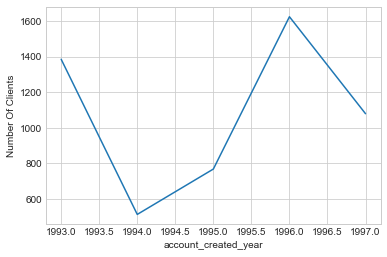

In [26]:
# Number of clients Yearly wise
c3 = Client_Base_Table.groupby('account_created_year')['client_id'].agg('count')
c3.plot.line()
plt.ylabel('Number Of Clients')
plt.show()


age_group
10     21
20    176
30    188
40    186
50    190
60     66
Name: LoanStatus, dtype: int64


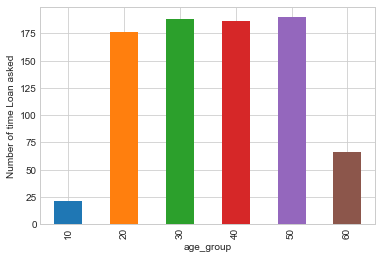

In [27]:
# Age Group that asked loan for the most
t = Client_Base_Table[Client_Base_Table.LoanStatus != 'Not Applicable']
t1 = t.groupby('age_group')['LoanStatus'].agg('count')
t1.plot.bar()
plt.ylabel('Number of time Loan asked')
print(t1)
plt.show()


LoanStatus  Contract Finished Loan Not Paid  Contract Running Debt  \
gender                                                               
F                                        17                     24   
M                                        14                     21   

LoanStatus  Contract Running ok so far  Contract finished without Issue  
gender                                                                   
F                                  246                              130  
M                                  247                              128  


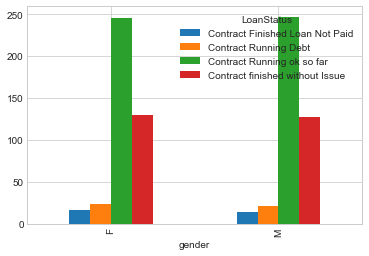

In [28]:
# Loan status in each gender
t2 = pd.pivot_table(t, values='client_id', index='gender', columns='LoanStatus', aggfunc='count', fill_value=0)
t2.plot.bar()
print(t2)
plt.show()

LoanStatus  Contract Finished Loan Not Paid  Contract Running Debt  \
age_group                                                            
10                                        0                      1   
20                                        6                     11   
30                                        4                     12   
40                                        7                      9   
50                                       10                      6   
60                                        4                      6   

LoanStatus  Contract Running ok so far  Contract finished without Issue  
age_group                                                                
10                                  13                                7  
20                                 103                               56  
30                                 115                               57  
40                                 114                               

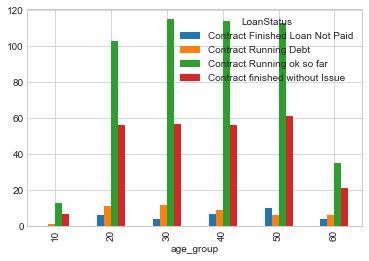

In [29]:
# loan status in each gender group
t3=pd.pivot_table(t, values='client_id', index='age_group', columns='LoanStatus', aggfunc='count', fill_value=0)
t3.plot.bar()
print(t3)
plt.show()

LoanStatus          Contract Finished Loan Not Paid  Contract Running Debt  \
length_of_relation                                                           
2                                                 0                      5   
3                                                 3                     20   
4                                                 8                      9   
5                                                 3                      4   
6                                                17                      7   

LoanStatus          Contract Running ok so far  \
length_of_relation                               
2                                          130   
3                                          213   
4                                           82   
5                                           39   
6                                           29   

LoanStatus          Contract finished without Issue  
length_of_relation                              

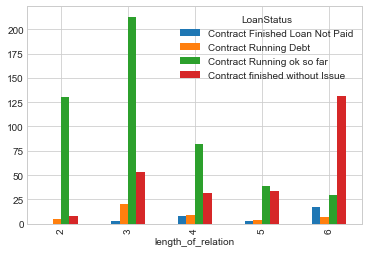

In [178]:
# loan status in each group of Length of relationship
t4 = pd.pivot_table(t, values='client_id', index='length_of_relation', columns='LoanStatus', aggfunc='count', fill_value=0)
t4.plot.bar()
print(t4)
plt.show()

credit_card_type
classic    49240.645436
gold       56839.396313
junior     45932.232929
Name: Avg_Monthly_Balance, dtype: float64


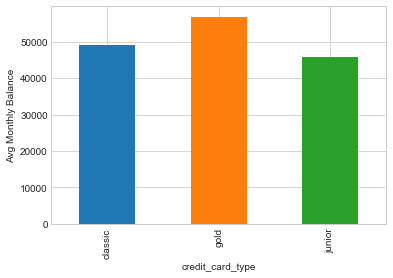

In [179]:
# Average monthly balance vs credit card
c = Client_Base_Table[Client_Base_Table.credit_card_type != 'Not Applicable']
c1 = c.groupby('credit_card_type')['Avg_Monthly_Balance'].agg('mean')
c1.plot.bar()
plt.ylabel('Avg Monthly Balance')
print(c1)
plt.show()


region
Prague             1287.563395
central Bohemia    1304.344262
east Bohemia       1309.064818
north Bohemia      1250.967951
north Moravia      1264.243609
south Bohemia      1254.348071
south Moravia      1271.920807
west Bohemia       1218.366009
Name: Avg_Monthly_Savings, dtype: float64


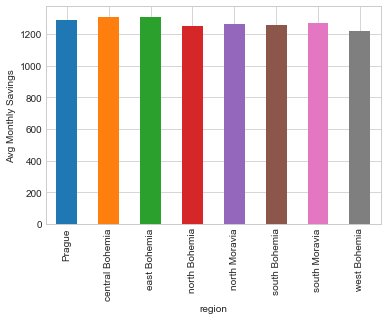

In [180]:
# Average monthly savings of clients in each region

c2 = Client_Base_Table.groupby('region')['Avg_Monthly_Savings'].agg('mean')
c2.plot.bar()
plt.ylabel('Avg Monthly Savings')
print(c2)
plt.show()


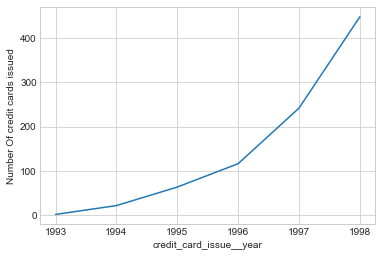

In [181]:
# Number of credit card issued Yearly wise
c5 = Client_Base_Table[Client_Base_Table.credit_card_issue__year != 0]
c4 =c5.groupby('credit_card_issue__year')['client_id'].agg('count')
c4.plot.line()
plt.ylabel('Number Of credit cards issued')
plt.show()


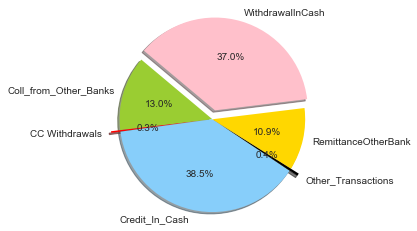

In [182]:
another_bank = round(sum(Client_Base_Table['Collection from another Bank']),2)
CreditCardWithdrawal = round(sum(Client_Base_Table['Credit Card Withdrawal']),2)
Credit_In_Cash = round(sum(Client_Base_Table['Credit In Cash']),2)
Other_Transactions = round(sum(Client_Base_Table['Other_Transactions']),2)
RemittanceotherBank = round(sum(Client_Base_Table['Remittance to another Bank']),2)
WithdrawalInCash = round(sum(Client_Base_Table['Withdrawal In Cash']),2)

labels = 'Coll_from_Other_Banks', 'CC Withdrawals', 'Credit_In_Cash', 'Other_Transactions', 'RemittanceOtherBank','WithdrawalInCash'
sizes = [another_bank, CreditCardWithdrawal, Credit_In_Cash, Other_Transactions,RemittanceotherBank,WithdrawalInCash]
colors = ['yellowgreen', 'red', 'lightskyblue', 'black','gold', 'pink']
explode = (0, 0.1, 0, 0.1, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


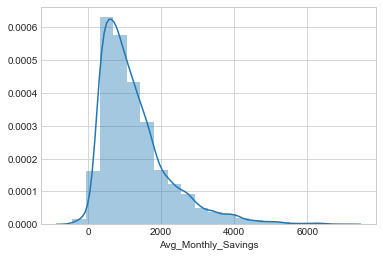

In [183]:
####################################################################

import seaborn
seaborn.distplot(Client_Base_Table['Avg_Monthly_Savings'], bins=20)



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


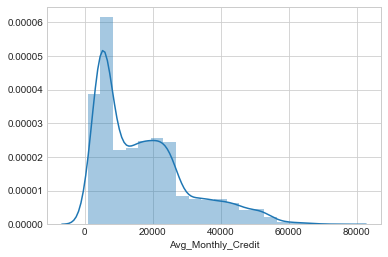

In [184]:
seaborn.distplot(Client_Base_Table['Avg_Monthly_Credit'], bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


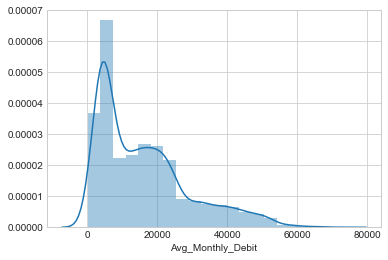

In [185]:
seaborn.distplot(Client_Base_Table['Avg_Monthly_Debit'], bins=20)


In [186]:
new = Client_Base_Table[['Avg_Monthly_Credit', 'Avg_Monthly_Debit', 'Avg_Monthly_Balance','Balance_Median_per_Month','Avg_Monthly_Savings','LoanAmount']].copy()


new = new.describe()
print(new)


       Avg_Monthly_Credit  Avg_Monthly_Debit  Avg_Monthly_Balance  \
count         5369.000000        5369.000000          5369.000000   
mean         17205.870248       15933.553315         35394.971856   
std          13361.537675       13024.033238         15283.644308   
min            934.693878         107.692308          5522.857576   
25%           5991.533333        5065.007143         22566.629032   
50%          14193.927778       12835.013333         33405.089706   
75%          24302.075000       22591.946667         45773.985714   
max          75197.181250       72330.918750         93869.350000   

       Balance_Median_per_Month  Avg_Monthly_Savings     LoanAmount  
count               5369.000000          5369.000000    5369.000000  
mean               35004.949246          1272.316934   23382.356491  
std                15582.976742           945.971919   70875.633343  
min                  358.500000          -430.677500       0.000000  
25%                22346.400

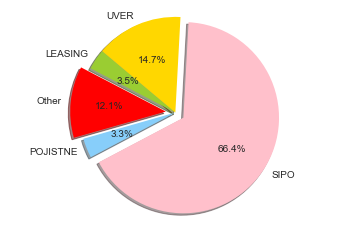

In [187]:
LEASING = round(sum(Client_Base_Table['LEASING']),2)
Other = round(sum(Client_Base_Table['Other']),2)
POJISTNE = round(sum(Client_Base_Table['POJISTNE']),2)
SIPO = round(sum(Client_Base_Table['SIPO']),2)
UVER = round(sum(Client_Base_Table['UVER']),2)

labels = 'LEASING', 'Other', 'POJISTNE', 'SIPO', 'UVER'
sizes = [LEASING, Other, POJISTNE, SIPO,UVER]
colors = ['yellowgreen', 'red', 'lightskyblue', 'pink','gold']
explode = (0, 0.1, 0, 0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
